In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install ultralytics
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 kB 4.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("python-bots2021-pz2rn").project("brrain_seg")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.10, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Brrain_Seg-1 in yolov8:: 100%|██████████| 1614/1614 [00:00<00:00, 1887.21it/s]


## Explore Dataset

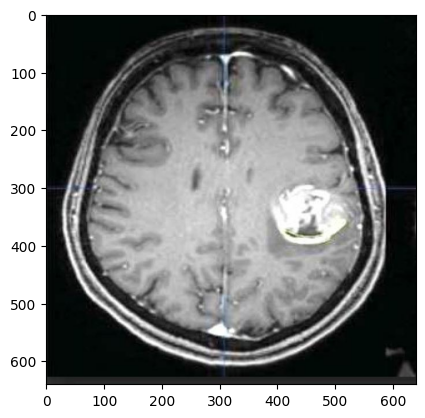

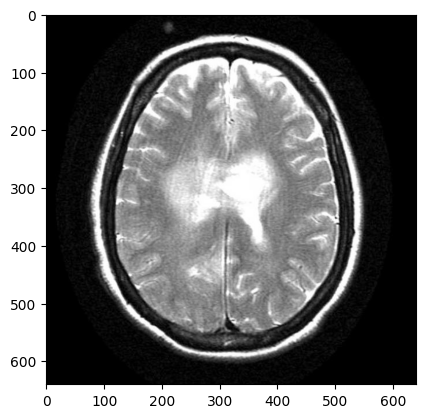

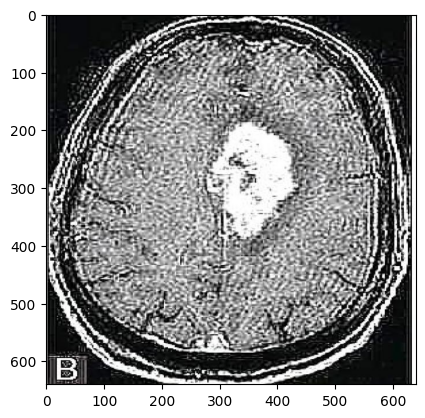

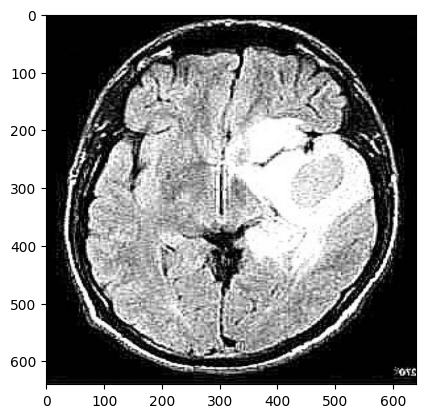

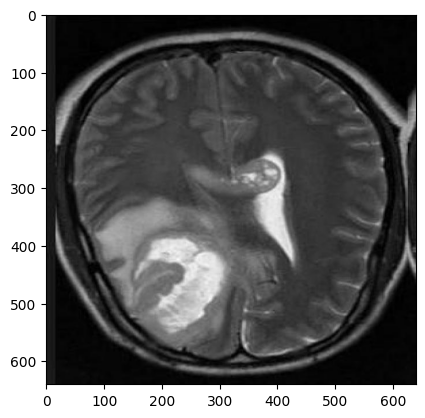

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

def show_images(dataset_path, num_images=5):
    images = os.listdir(dataset_path)
    for i in range(num_images):
        image = cv2.imread(os.path.join(dataset_path, images[i]))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.show()

show_images(dataset.location+ '/train/images')

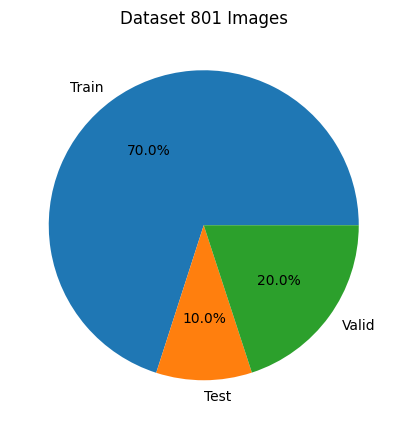

In [ ]:
# create pie chart
plt.figure(figsize=(5,10))
plt.title(f"Dataset {len(os.listdir(dataset.location+ '/train/images')) + len(os.listdir(dataset.location+ '/test/images')) +len(os.listdir(dataset.location+ '/valid/images'))} Images" )
plt.pie([len(os.listdir(dataset.location+ '/train/images')), len(os.listdir(dataset.location+ '/test/images')), len(os.listdir(dataset.location+ '/valid/images'))], labels=["Train", "Test", 'Valid'], autopct='%1.1f%%')
plt.show()

## Train model

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('best.pt')  # load a pretrained model (recommended for training)

In [ ]:
# Train the model
results = model.train(data='/content/data.yaml', epochs=50, imgsz=640)

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=best.pt, data=/content/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

train: Scanning /content/Brrain_Seg-1/train/labels.cache... 561 images, 122 backgrounds, 0 corrupt: 100%|██████████| 561/561 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Brrain_Seg-1/valid/labels.cache... 160 images, 29 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]


Plotting labels to runs/segment/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.09G     0.6905       1.21     0.6694      1.135          2        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        160        140      0.767      0.871      0.827      0.663      0.767      0.871      0.826      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.59G     0.7651      1.303     0.7535      1.171          4        640: 100%|██████████| 36/36 [00:24<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        160        140      0.777      0.872       0.82      0.647      0.784      0.879      0.826      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.65G     0.8193      1.392      0.818      1.234          1        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        160        140      0.728      0.843      0.783      0.596      0.779      0.779      0.762      0.549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.36G     0.8272      1.487     0.8996      1.207          3        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]

                   all        160        140      0.756      0.774      0.758      0.593      0.769      0.787      0.773      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.37G     0.9005      1.515      0.873      1.253          1        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]

                   all        160        140      0.736      0.836      0.775      0.595      0.736      0.836      0.769      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.37G     0.8236      1.484     0.8292      1.225          4        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        160        140       0.79      0.871      0.838      0.656      0.797      0.879      0.845      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.38G     0.8152      1.434     0.8531      1.225          4        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        160        140      0.695      0.686      0.666      0.495      0.685      0.721       0.68      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.03G     0.8307      1.471     0.8447      1.219          3        640: 100%|██████████| 36/36 [00:24<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        160        140      0.712      0.864      0.808      0.634      0.717      0.871      0.812      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.04G     0.8059      1.368     0.8635      1.187          1        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        160        140      0.764      0.832      0.796      0.619       0.77      0.839        0.8      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.02G     0.7973      1.448     0.9361      1.196          0        640: 100%|██████████| 36/36 [00:24<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        160        140      0.739      0.771       0.73      0.568      0.745      0.779       0.74      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.03G     0.8076      1.468     0.8071      1.212          2        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        160        140       0.76      0.813      0.793      0.618       0.76      0.813      0.793      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.04G     0.8169      1.471     0.9365      1.213          0        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        160        140      0.789      0.786      0.795      0.615      0.789      0.786      0.794      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.05G     0.7696      1.439     0.7531      1.181          3        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all        160        140      0.749      0.829      0.805      0.643      0.755      0.836      0.811      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.04G     0.7747      1.459     0.8193      1.219          2        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        160        140      0.753      0.891      0.847      0.638      0.752      0.879      0.843      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.04G     0.8198       1.47       0.82      1.194          2        640: 100%|██████████| 36/36 [00:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]

                   all        160        140      0.764      0.811      0.766      0.604      0.778      0.801      0.773       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.04G     0.7555      1.342      0.742      1.183          3        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        160        140      0.811      0.857      0.829      0.664       0.81      0.864      0.834      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50         8G     0.7683       1.43     0.8078      1.159          0        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        160        140      0.781      0.841      0.805      0.632       0.77      0.864      0.814      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.04G     0.7604      1.383     0.7927      1.185          3        640: 100%|██████████| 36/36 [00:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        160        140      0.788      0.871      0.819      0.667      0.795      0.879      0.832      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.04G      0.779      1.312      0.744      1.186          2        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        160        140      0.786      0.843      0.791      0.637      0.809       0.85      0.803      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.96G     0.7359      1.283     0.8815      1.159          0        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        160        140      0.829      0.843      0.829      0.668      0.836       0.85      0.837      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.05G     0.8426      1.371      0.742      1.233          1        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]

                   all        160        140      0.784      0.857      0.838      0.665      0.784      0.857      0.842      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.04G     0.7316      1.377     0.7215      1.205          1        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        160        140      0.785      0.836      0.813      0.635      0.785      0.836      0.812      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.05G     0.7258      1.349     0.7555      1.188          1        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        160        140      0.831      0.836      0.809      0.653      0.824      0.829      0.796      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.01G     0.7186      1.342     0.8137      1.159          0        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        160        140      0.815      0.836      0.834      0.678      0.815      0.836      0.828      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.04G     0.7343      1.322     0.7262      1.191          1        640: 100%|██████████| 36/36 [00:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        160        140      0.784      0.836      0.794      0.643      0.784      0.836      0.786      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.03G     0.7361      1.265     0.7457      1.172          1        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        160        140      0.779      0.871      0.819      0.657      0.792      0.886      0.836       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.04G     0.7735       1.36     0.7393      1.198          1        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

                   all        160        140      0.796      0.862      0.818      0.666      0.802      0.869      0.825       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.03G      0.765      1.377     0.8095      1.195          1        640: 100%|██████████| 36/36 [00:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

                   all        160        140      0.808      0.904      0.844      0.681      0.816      0.916      0.854      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.05G     0.7398      1.312     0.7053       1.16          1        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]

                   all        160        140      0.777      0.879      0.848      0.686      0.798      0.871      0.862      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.01G     0.7332      1.313     0.6768      1.156          2        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        160        140      0.789      0.853      0.838      0.674      0.782      0.845      0.828      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.03G     0.6975      1.258     0.6405      1.117          2        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

                   all        160        140      0.803      0.793      0.842        0.7      0.782      0.843      0.855      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.04G     0.7087      1.248     0.6737      1.148          2        640: 100%|██████████| 36/36 [00:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        160        140      0.824      0.786      0.797      0.653      0.836      0.803      0.819      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.97G     0.7147      1.304     0.6623      1.189          1        640: 100%|██████████| 36/36 [00:24<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        160        140      0.821      0.807      0.816      0.658      0.821      0.807      0.821       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.05G     0.7336      1.386     0.8582      1.183          1        640: 100%|██████████| 36/36 [00:24<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        160        140      0.798      0.893      0.859      0.703      0.805        0.9      0.865      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.02G     0.6648      1.237     0.6182      1.126          1        640: 100%|██████████| 36/36 [00:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        160        140      0.818      0.864       0.82       0.68      0.831      0.878      0.833      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.01G     0.6733      1.174      0.612      1.128          1        640: 100%|██████████| 36/36 [00:24<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        160        140      0.801      0.829      0.847      0.694      0.815      0.843      0.857       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.03G     0.6811      1.224     0.6586      1.121          2        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        160        140      0.795      0.836      0.818      0.669      0.801      0.829      0.822      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.01G     0.6483      1.168     0.6047      1.102          3        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        160        140      0.813      0.886      0.836      0.699      0.827        0.9      0.852      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.04G     0.6769      1.189     0.6305       1.13          3        640: 100%|██████████| 36/36 [00:24<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]

                   all        160        140      0.783      0.877      0.867       0.72      0.804      0.871      0.871       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.04G     0.6454      1.206     0.5866      1.101          2        640: 100%|██████████| 36/36 [00:24<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        160        140      0.813      0.807       0.84      0.699       0.82      0.815      0.842      0.664


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.03G     0.5928      1.051     0.6309      1.153          0        640: 100%|██████████| 36/36 [00:25<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        160        140      0.821      0.836       0.82      0.667      0.828      0.843      0.832      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.03G     0.5732      1.027     0.5393      1.165          1        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        160        140      0.804      0.879      0.842      0.677      0.804      0.879      0.836      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.03G      0.577      1.018     0.7102      1.134          0        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]

                   all        160        140      0.853       0.83      0.843      0.692      0.853       0.83      0.846      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.03G     0.5935      1.035     0.5298      1.161          1        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        160        140      0.801      0.864      0.826       0.68      0.845      0.829      0.834      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.02G     0.5404     0.9814     0.4916      1.114          0        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

                   all        160        140       0.84      0.824      0.813      0.672      0.847      0.831      0.824       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.05G     0.5705      1.011     0.5394      1.123          1        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        160        140      0.777      0.879      0.817      0.675      0.827      0.836      0.831      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.06G     0.5497     0.9717     0.4782      1.104          1        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

                   all        160        140      0.791      0.867      0.824      0.683      0.842      0.835      0.839      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.04G     0.5776     0.9719     0.4797      1.149          1        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        160        140      0.836      0.835      0.811      0.678      0.843      0.842      0.824      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.03G     0.5384     0.9553     0.5012      1.082          0        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        160        140      0.817       0.85      0.813      0.681      0.824      0.857      0.827      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.03G     0.5234     0.9567     0.4679      1.088          1        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        160        140       0.81      0.852       0.81      0.676      0.817      0.858      0.824      0.634



50 epochs completed in 0.455 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 54.8MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]


                   all        160        140      0.783      0.877      0.867      0.721      0.804      0.871      0.871       0.68
Speed: 0.5ms preprocess, 15.0ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/segment/train3


## Validate Model

In [ ]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered


Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


val: Scanning /content/Brrain_Seg-1/valid/labels.cache... 160 images, 29 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


                   all        160        140      0.783      0.876      0.867       0.72      0.804      0.871      0.871       0.68
Speed: 0.5ms preprocess, 32.0ms inference, 0.1ms loss, 5.2ms postprocess per image
Results saved to runs/segment/train32


### Training Results

- It shows that we achive mAP50: 86.7%
- It shows that we achive mAP50-95: 72%

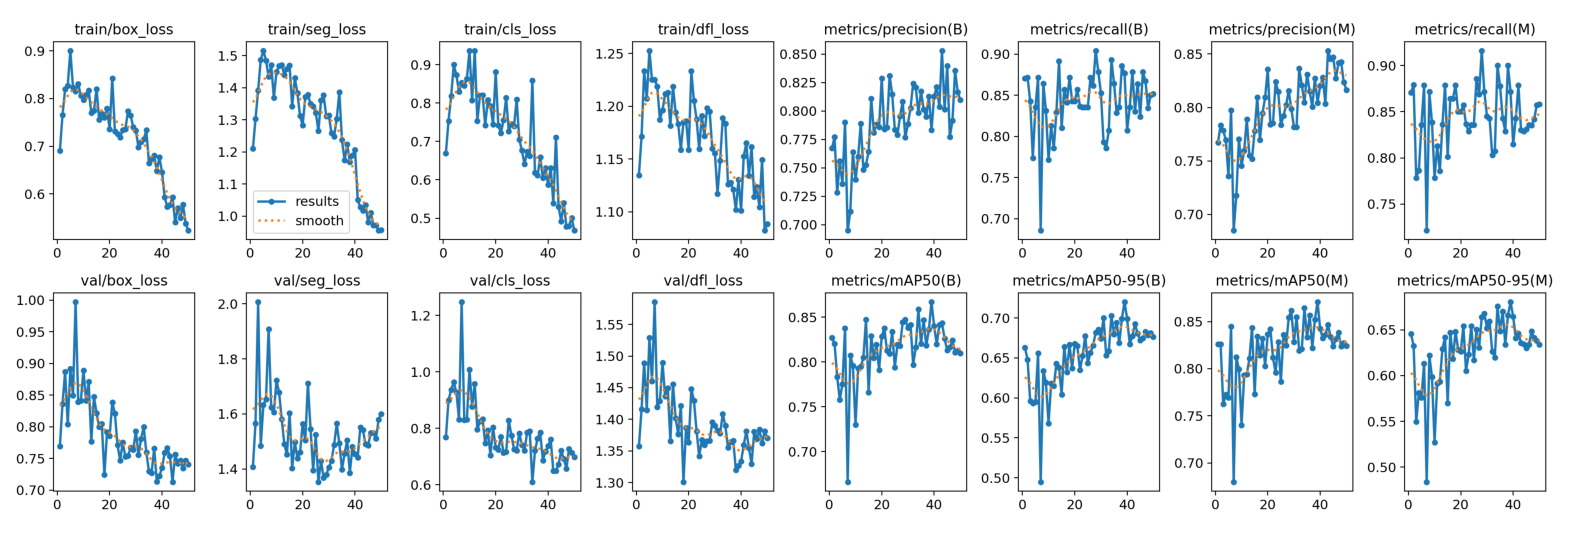

In [ ]:
img = cv2.cvtColor(cv2.imread('/content/model/segment/train3/results.png'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,30))
plt.imshow(img)
plt.axis('off')
plt.show()

### PR Curve
Precision measures the proportion of true positive detections among all positive detections, while recall measures the proportion of true positive detections among all actual positives in the dataset. In other words, precision tells us how many of the predicted detections are relevant, while recall tells us how many relevant detections were actually found.

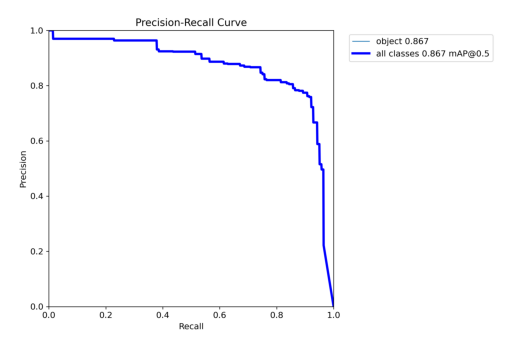

In [ ]:
img = cv2.cvtColor(cv2.imread('/content/model/segment/train3/BoxPR_curve.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

### Save Model in drive

In [ ]:
# import shutil
# import os

# shutil.make_archive('Yolo_model_results', 'zip', '/content/runs')


'/content/Yolo_model_results.zip'

## Test model

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('/content/model/segment/train3/weights/best.pt')  # load a pretrained model (recommended for training)

In [ ]:
result = model('/content/Brrain_Seg-1/test/images/y103_jpg.rf.32e57cab3c8ec4561b76b8645259354d.jpg')


image 1/1 /content/Brrain_Seg-1/test/images/y103_jpg.rf.32e57cab3c8ec4561b76b8645259354d.jpg: 640x640 1 object, 1948.5ms
Speed: 3.6ms preprocess, 1948.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
def predict_with_bounding_box(image_path, model_name="/content/model/segment/train3/weights/best.pt"):

    # Load the YOLOv8 model
    model = YOLO(model_name)

    # Read the image
    img = cv2.imread(image_path)

    # Make the prediction
    results = model(img)

    # Filter and draw bounding boxes
    for det in results[0].boxes:
        print(det.xyxy.tolist())

        # Get bounding box coordinates
        x_min, y_min, x_max, y_max = det.xyxy.tolist()[0]

        # Draw bounding box and label (class name)
        cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 0), 2)  # Green for detected objects

    return img



0: 640x640 (no detections), 1778.3ms
Speed: 5.0ms preprocess, 1778.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


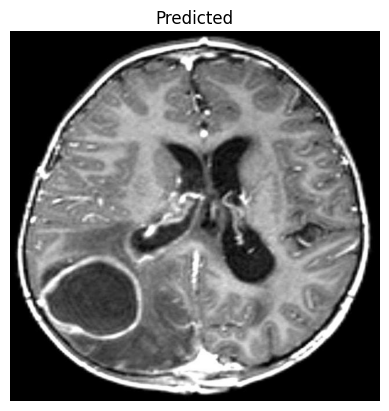


0: 640x640 1 object, 1828.5ms
Speed: 5.2ms preprocess, 1828.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
[[208.15646362304688, 253.40798950195312, 360.4990539550781, 447.7223205566406]]


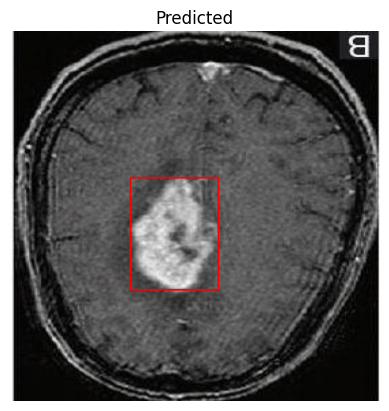


0: 640x640 1 object, 2895.6ms
Speed: 6.6ms preprocess, 2895.6ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)
[[299.656005859375, 399.5025634765625, 484.19921875, 583.9765625]]


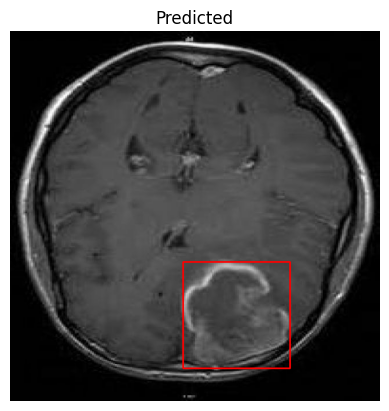


0: 640x640 1 object, 1787.5ms
Speed: 3.9ms preprocess, 1787.5ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)
[[430.787109375, 193.47579956054688, 584.2056884765625, 326.1952819824219]]


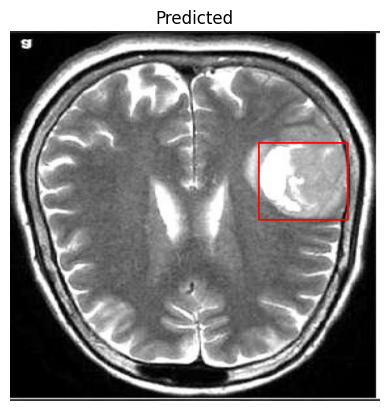


0: 640x640 1 object, 1805.8ms
Speed: 3.4ms preprocess, 1805.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
[[213.79977416992188, 176.34371948242188, 385.5339660644531, 291.9400329589844]]


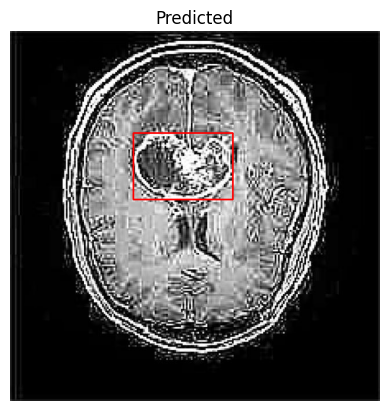

In [ ]:
import random

images = os.listdir('/content/Brrain_Seg-1/test/images')
random.shuffle(images)
for i in range(5):
    image = os.path.join('/content/Brrain_Seg-1/test/images', images[i])
    img_predicted = predict_with_bounding_box(image)
    plt.imshow(img_predicted)
    plt.title('Predicted')
    plt.axis('off')
    plt.show()